In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch # For the dendrogram


In [ ]:
df = pd.read_csv('sales_data_sample.csv', encoding='latin1')


# Select features, drop NaNs
features = df[['SALES', 'QUANTITYORDERED']].copy()
features = features.dropna()

In [ ]:
# --- 3. Feature Scaling (Same as before) ---
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
df_scaled = pd.DataFrame(scaled_features, columns=['SALES', 'QUANTITYORDERED'])

In [19]:
scaled_features.head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'

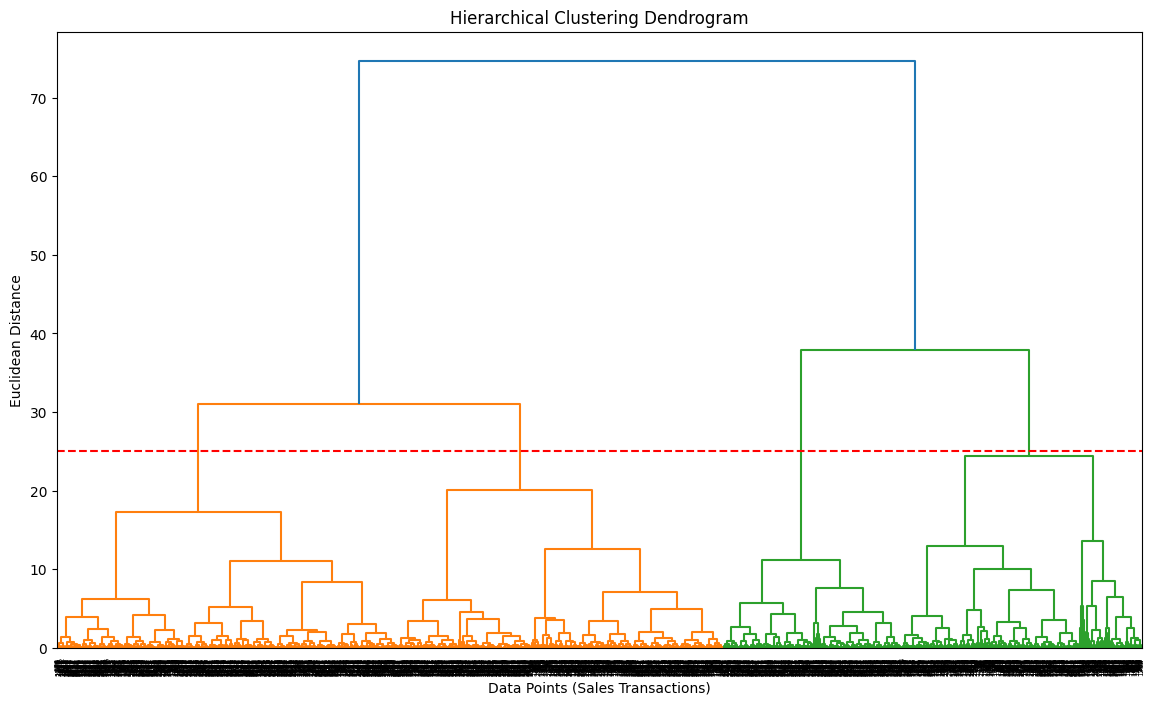

In [16]:

plt.figure(figsize=(14, 8))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points (Sales Transactions)')
plt.ylabel('Euclidean Distance')

dendrogram = sch.dendrogram(sch.linkage(df_scaled, method='ward'))

plt.axhline(y=25, color='r', linestyle='--') # Example cut line
plt.show()

In [12]:
chosen_k = 4 
hc_model = AgglomerativeClustering(n_clusters=chosen_k, 
                                   metric='euclidean', 
                                   linkage='ward')

In [13]:
cluster_labels = hc_model.fit_predict(df_scaled)

# Add the cluster labels back to our *original* features DataFrame
features['cluster'] = cluster_labels

In [18]:
features.head()

,SALES,QUANTITYORDERED,cluster
0,2871.00,30,3
1,2765.90,34,3
2,3884.34,41,3
3,3746.70,45,2
4,5205.27,49,0


<Axes: xlabel='SALES', ylabel='QUANTITYORDERED'>

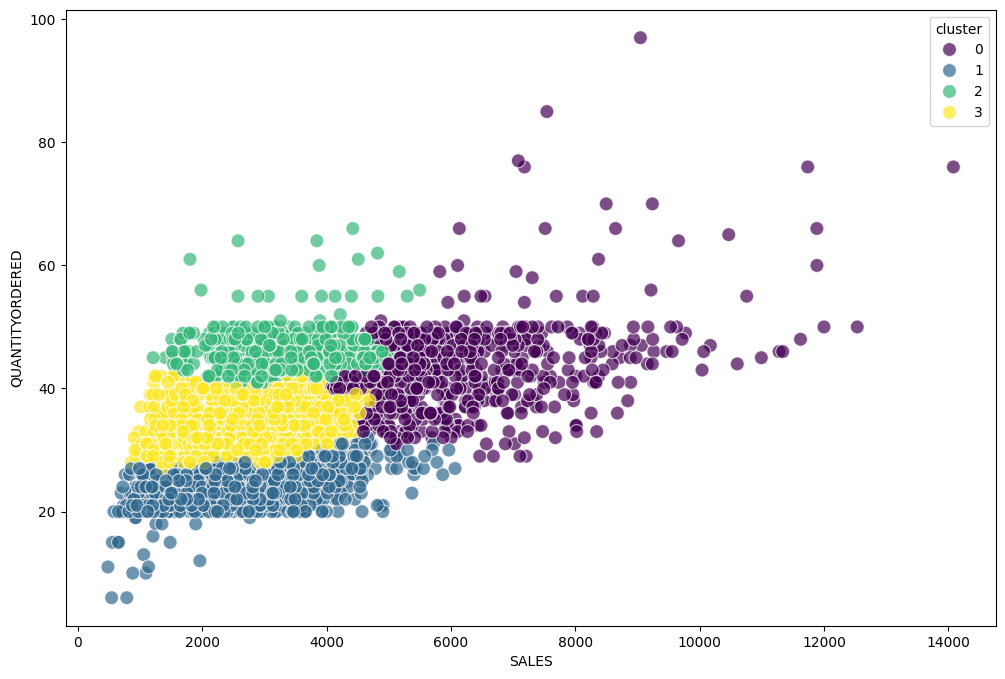

In [14]:
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=features,
    x='SALES',
    y='QUANTITYORDERED',
    hue='cluster',  # Color points by their new cluster
    palette='viridis',
    s=100,
    alpha=0.7
)